In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1)

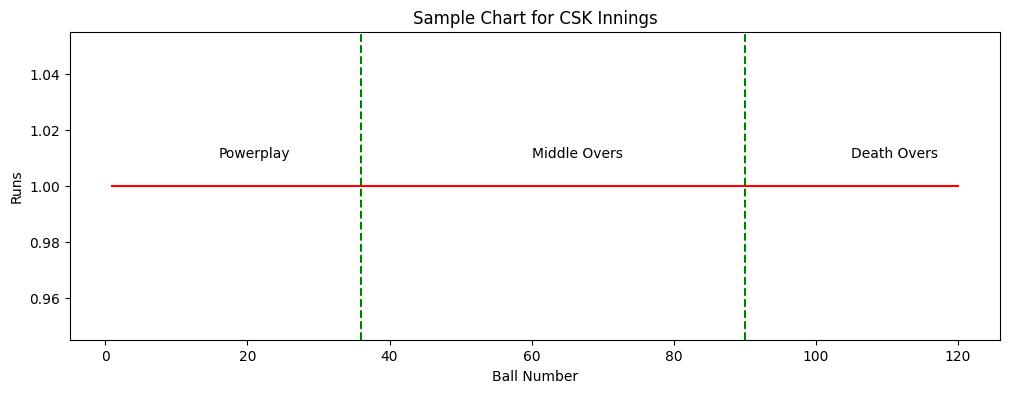

In [14]:
x = [i for i in range(1, 121)]
y = [1 for i in range(1, 121)]

plt.figure(figsize = (12, 4))
plt.plot(x, y, c = 'r')

plt.axvline(x = 36, ls = '--', c = 'g')
plt.axvline(x = 90, ls = '--', c = 'g')

plt.text(16, 1.01, "Powerplay")
plt.text(60, 1.01, "Middle Overs")
plt.text(105, 1.01, "Death Overs")

plt.xlabel("Ball Number")
plt.ylabel("Runs")
plt.title("Sample Chart for CSK Innings")
plt.show()

In [15]:
df=pd.read_csv('C:\deliveries.csv')

In [16]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [17]:
df.match_id.unique()

array([ 335982,  335983,  335984, ..., 1370351, 1370352, 1370353],
      dtype=int64)

In [22]:
# step 1: Populate runs for both innings
# step 2: Populate wickets for both innings

In [23]:
def show_summary(df, matchID):

    df = df[df.match_id == matchID]

    df1 = df[df.inning == 1]
    df2 = df[df.inning == 2]

    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)

    df1['cum_runs'] = 0
    df2['cum_runs'] = 0

    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i] = runs_count

    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i] = runs_count

    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]

    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cum_runs)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]

    plt.figure(figsize = (16, 6))

    plt.plot(ball_no_ing1, df1.cum_runs, linewidth = 3, label = team1)
    plt.plot(ball_no_ing2, df2.cum_runs, linewidth = 3, label = team2)

    plt.scatter(wk_index1, wk_runs1, s = 150)
    plt.scatter(wk_index2, wk_runs2, s = 150)

    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')

    plt.text(16, 1.01, "Powerplay")
    plt.text(60, 1.01, "Middle Overs")
    plt.text(105, 1.01, "Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("Match Summary - Runs progression Chart")
    plt.legend()

    plt.show()

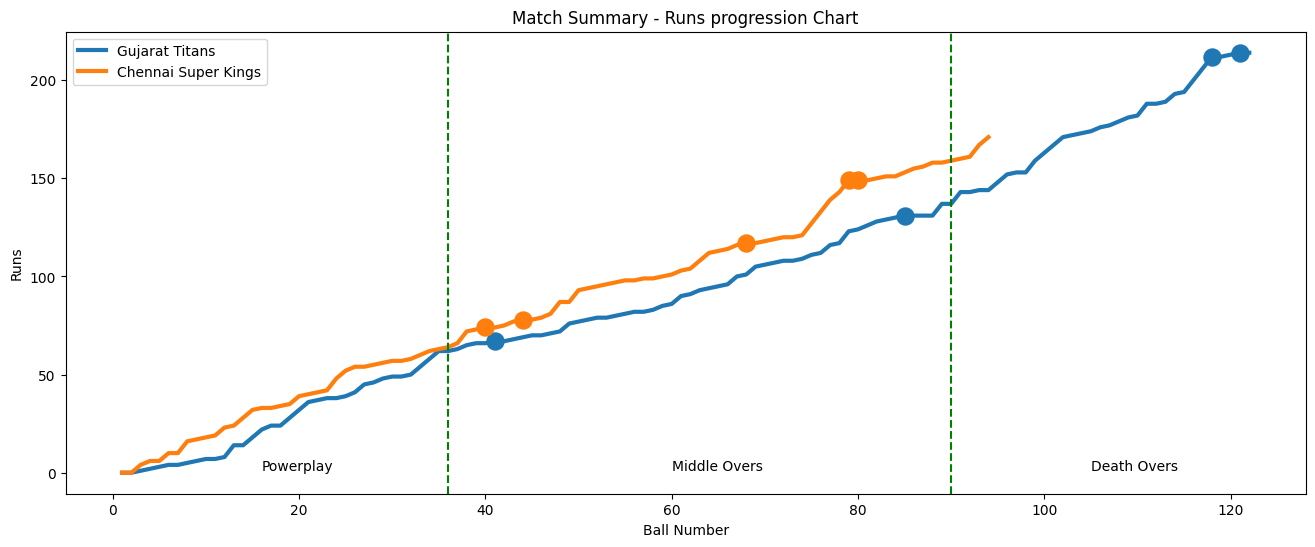

In [28]:
show_summary(df,1370353)